In [49]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np

In [2]:
#pip install plotly

In [3]:
# folder path
dir_path = r'.\Data'

def make_directory(path):
    temp = []
    # Iterate directory
    for i in os.listdir(path):
    # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, i)):
                temp.append(os.path.join(dir_path, i))

    return temp

temp = make_directory(dir_path)

temp

['.\\Data\\GasFutureHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasFutureHistory_THE_2021.xlsx',
 '.\\Data\\GasFutureHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasSpotHistory_THE_2021.xlsx',
 '.\\Data\\GasSpotHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2019.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2020.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2021.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2022.xlsx',
 '.\\Data\\Temp_max.xlsx']

In [4]:
#empty dictionary for dataframes
commodity = {}
# Iterate files
df_temp = pd.read_excel('.\\Data\\Temp_max.xlsx')
df_temp['Tmean'] = (df_temp['Tmax'] +df_temp['Tmin'])/2
df_temp['date2'] = df_temp['date'].str[5:]
d = dict(zip(df_temp.date2, df_temp.Tmean))
for file in temp:
    #check if files are Spot market relates
    if 'Spot' in file:
        df = pd.read_excel(file, header = 2, sheet_name= None)
        #dynamicly create keys for dict
        name_WAAP = 'df_WAAP_'+list(df.keys())[3][:4].strip()
        name_DA = 'df_DA_'+list(df.keys())[3][:4].strip()
        #Check if keys already in dict
        if name_WAAP and name_DA not in commodity .keys():
            #create key and value pair for weighted average Price and Spot products
            commodity[name_DA] = df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).mean()
            commodity[name_WAAP] = df['EGSI']
        else:
            #if keys already created join dataframes
            commodity [name_WAAP] = pd.concat([commodity [name_WAAP],df['EGSI']], ignore_index=True).sort_values('Trading Date')
            commodity[name_WAAP]['Date'] = commodity[name_WAAP]['Trading Date'].astype(str).str[5:]
            commodity[name_WAAP]['Tmean'] =commodity[name_WAAP]['Date'].map(d)
            commodity [name_DA] = pd.concat([commodity [name_DA],df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).mean()], ignore_index=False)

In [5]:
commodity.keys()

dict_keys(['df_DA_CEGH', 'df_WAAP_CEGH', 'df_DA_THE', 'df_WAAP_THE', 'df_DA_TTF', 'df_WAAP_TTF'])

Text(0.5, 1.0, 'Avg Spot Price CEGH')

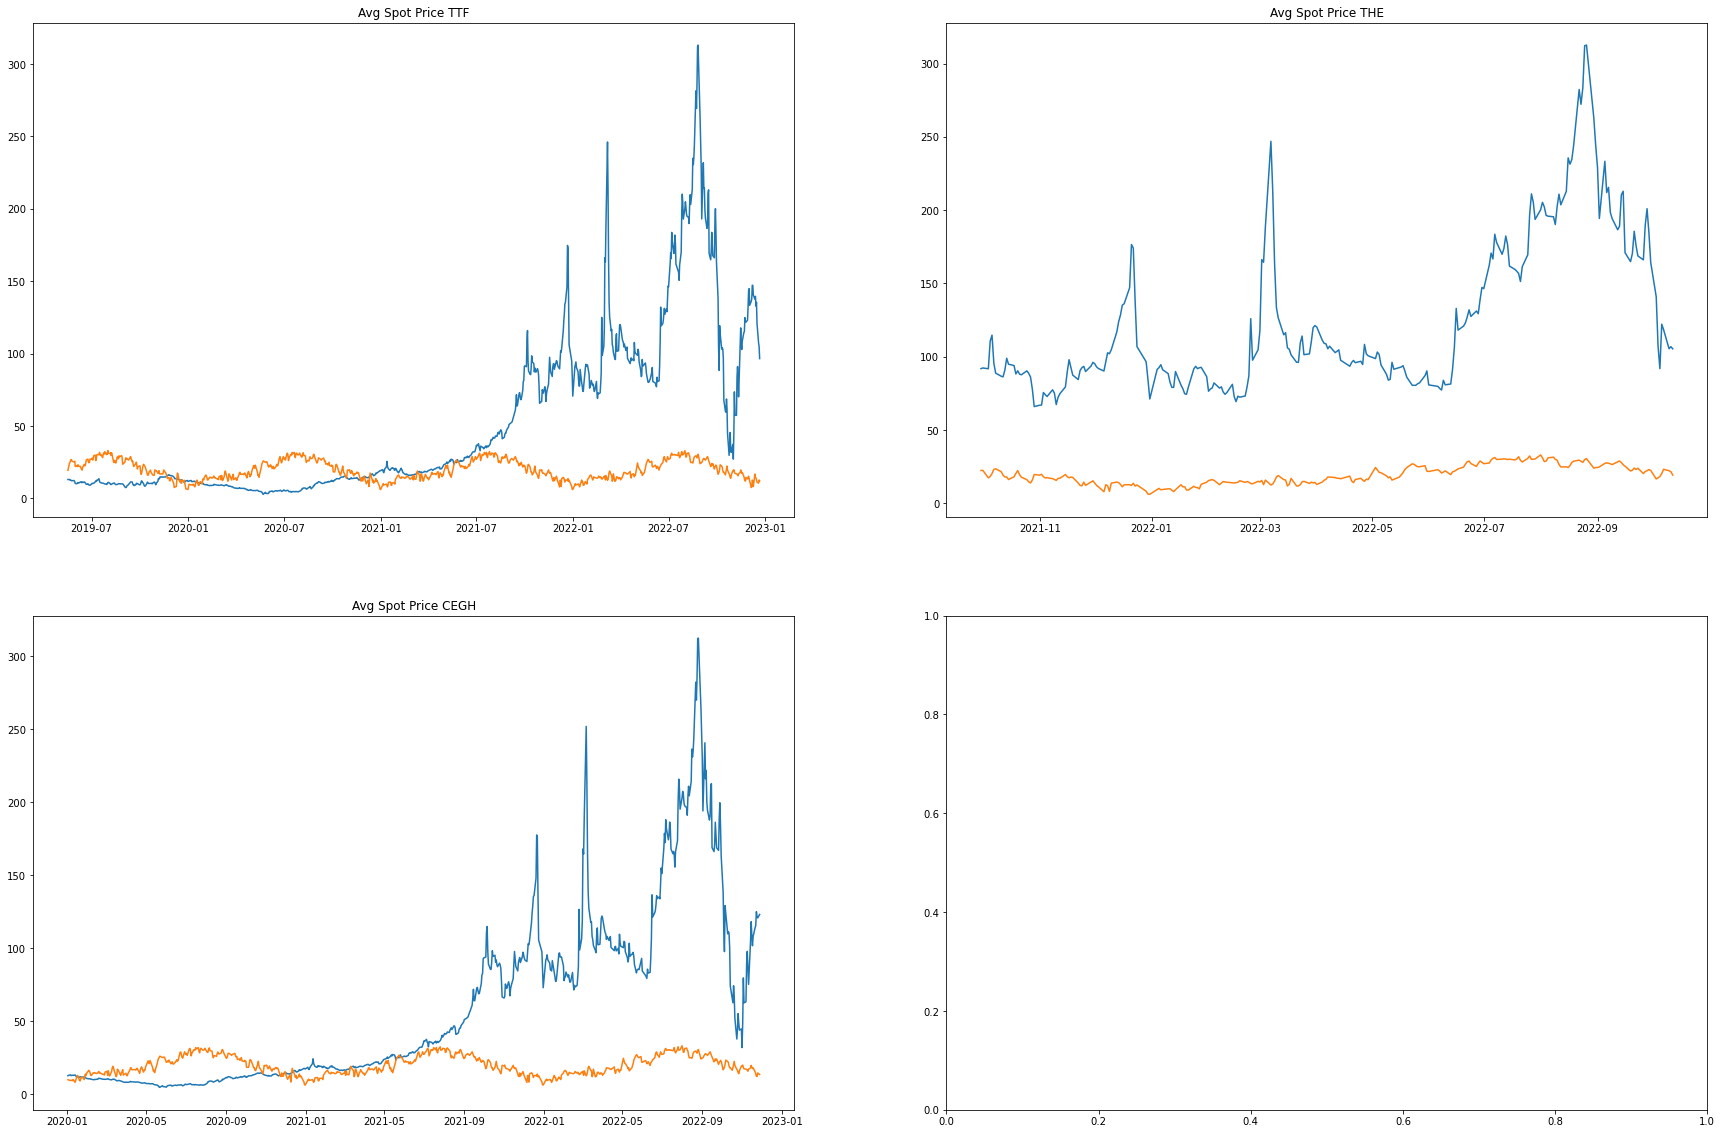

In [6]:
fig, axs = plt.subplots(2, 2, figsize = (30,20))
axs[0, 0].plot(commodity ['df_WAAP_TTF'].groupby(by = 'Trading Date').mean())
axs[0, 0].set_title('Avg Spot Price TTF')
axs[0, 1].plot(commodity ['df_WAAP_THE'].groupby(by = 'Trading Date').mean())
axs[0, 1].set_title('Avg Spot Price THE')
axs[1, 0].plot(commodity ['df_WAAP_CEGH'].groupby(by = 'Trading Date').mean())

axs[1, 0].set_title('Avg Spot Price CEGH')

In [16]:
#commodity['df_DA_CEGH'].reset_index(level=1,inplace = True)
commodity['df_DA_TTF'].reset_index(level=1,inplace = True)
commodity['df_DA_THE'].reset_index(level=1,inplace = True)

Text(0.5, 1.0, 'Number of Trades CEGH')

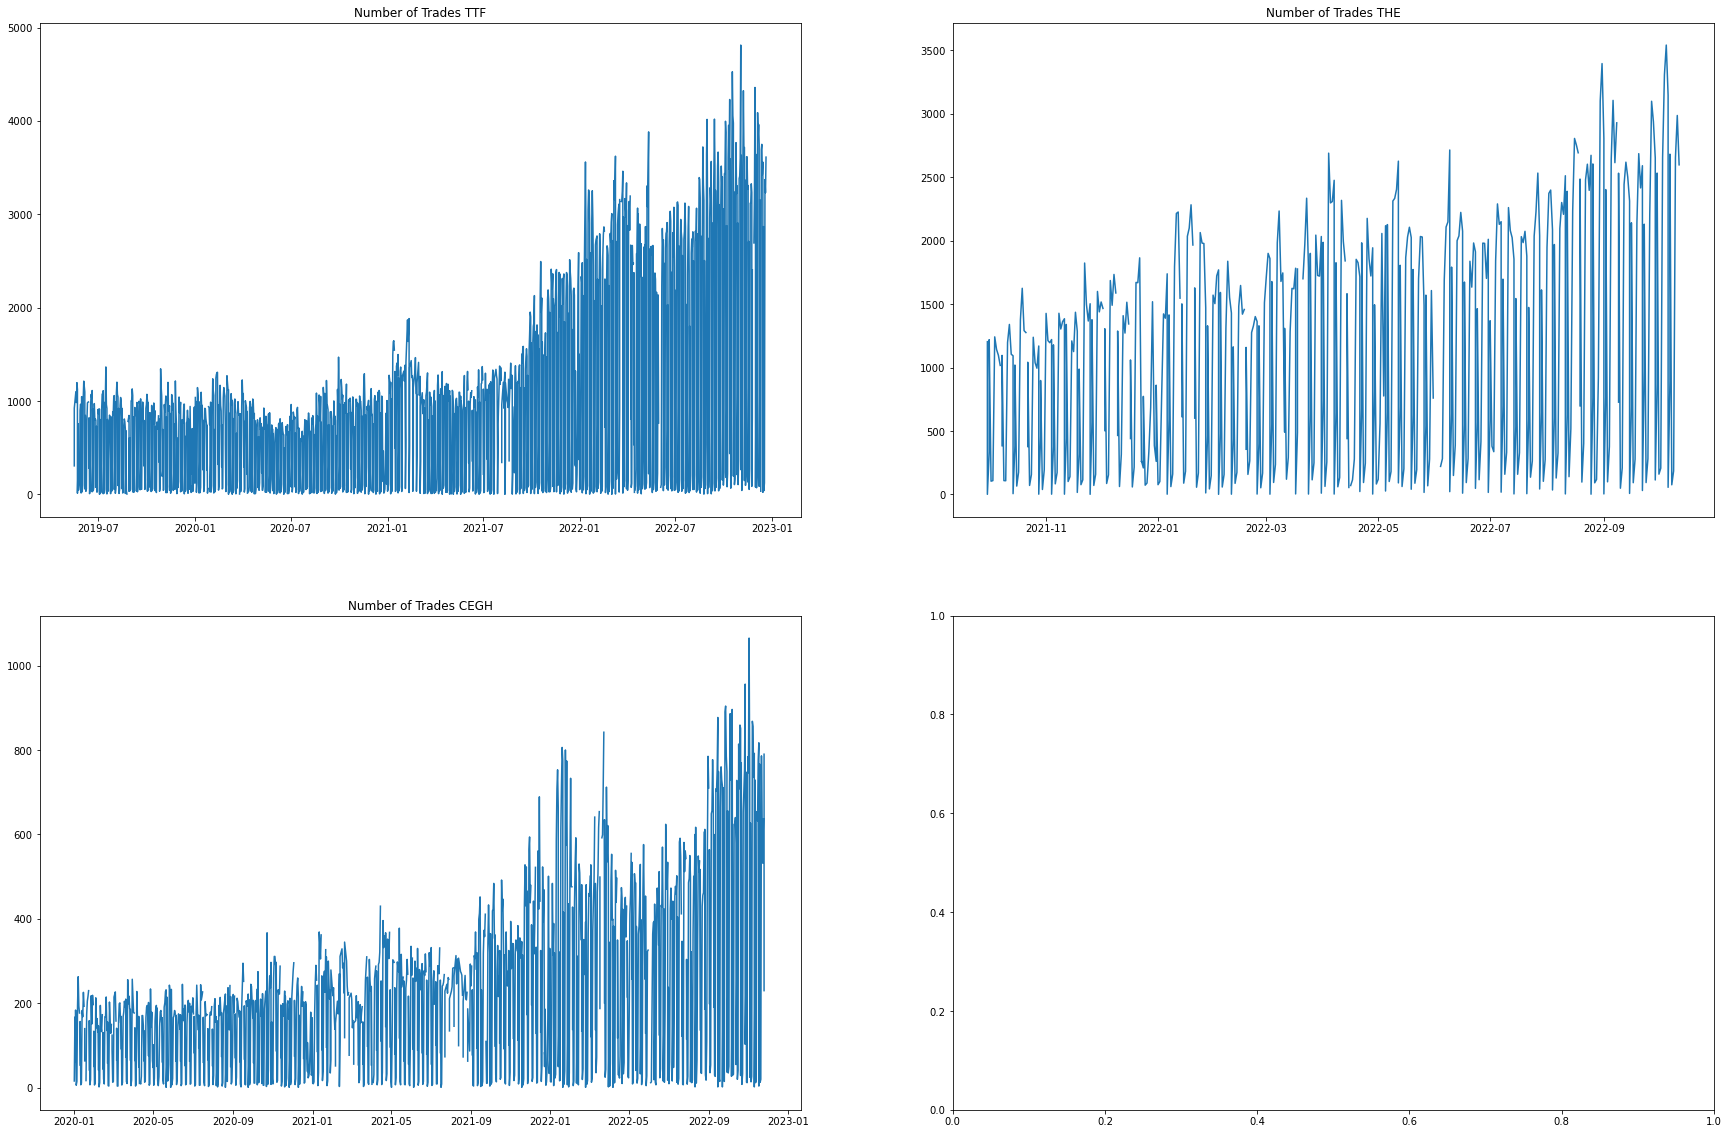

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (30,20))
axs[0, 0].plot(commodity['df_DA_TTF']['Number of Trades'])
axs[0, 0].set_title('Number of Trades TTF')
axs[0, 1].plot(commodity['df_DA_THE']['Number of Trades'])
axs[0, 1].set_title('Number of Trades THE')
axs[1, 0].plot(commodity['df_DA_CEGH']['Number of Trades'])
axs[1, 0].set_title('Number of Trades CEGH')

In [43]:
commodity['df_DA_CEGH'].groupby(by = ['Product'])['Open Price','High Price','Low Price','Last Price'].mean()

C:\Users\Megaport\AppData\Local\Temp/ipykernel_9336/575413983.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Open Price,High Price,Low Price,Last Price
Product,,,,
GND1,59.226818,62.644608,56.751544,44.096383
GWE1,64.155875,66.494500,60.044625,52.418129


In [57]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{}, {}],
                           [{"colspan": 2}, None]],
                    subplot_titles=("Product and Price - TTF","Product and Price - THE", "Product and Price - CEGH"))

fig.add_trace(
    go.Scatter( x=commodity['df_DA_TTF']['Product'],
                y=commodity['df_DA_TTF'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers"),
        row=1, col=1
                )
fig.add_trace(
    go.Scatter( x=commodity['df_DA_THE']['Product'],
                y=commodity['df_DA_THE'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers"),
    row=1, col=2
)
fig.add_trace(
    go.Scatter( x=commodity['df_DA_CEGH']['Product'],
                y=commodity['df_DA_CEGH'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers"),
    row=2, col=1
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    showlegend=False,
    title_text="Product and Price Commodity 2020 - Oktober.2022")
fig.show()

In [ ]:
commodity['df_DA_CEGH']['weekday'] = commodity['df_DA_CEGH'].index.dayofweek
commodity['df_DA_TTF']['weekday'] = commodity['df_DA_TTF'].index.dayofweek
commodity['df_DA_THE']['weekday'] = commodity['df_DA_THE'].index.dayofweek

In [74]:
df_week = commodity['df_DA_CEGH'].groupby(by = ['weekday'])['Number of Trades'].mean()
df_week
fig = px.bar(df_week)
fig.show()

In [73]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{}, {}],
                           [{"colspan": 2}, None]],
                    subplot_titles=("Product and Price - TTF","Product and Price - THE", "Product and Price - CEGH"))

fig.add_trace(
    go.Box( x=commodity['df_DA_TTF']['weekday'],
                y=commodity['df_DA_TTF'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=1, col=1
)
fig.add_trace(
    go.Box( x=commodity['df_DA_THE']['weekday'],
                y=commodity['df_DA_THE'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
               ),
    row=1, col=2
)
fig.add_trace(
    go.Box( x=commodity['df_DA_CEGH']['weekday'],
                y=commodity['df_DA_CEGH'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                ),
    row=2, col=1
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    showlegend=False,
    title_text="Product and Price Commodity 2020 - Oktober.2022")
fig.show()

In [75]:
commodity['df_DA_CEGH']

,Product,Settlement\nPrice,Open Price,High Price,Low Price,Last Price,Traded Lots,Traded Volume,Number of Trades,weekday
Trading Date,,,,,,,,,,
2020-01-01,GND1,NaN,12.975000,13.100000,12.500000,13.050,610.000000,14640.0,16.000000,2
2020-01-02,GND1,12.186,12.875000,13.000000,12.025000,12.025,8480.000000,203520.0,167.000000,3
2020-01-02,GWE1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2020-01-03,GND1,13.399,12.458333,13.425000,12.391667,13.275,3383.000000,81192.0,62.333333,4
2020-01-03,GWE1,13.358,12.525000,13.600000,12.525000,13.025,9567.000000,459216.0,184.000000,4
...,...,...,...,...,...,...,...,...,...,...
2022-11-25,GND1,125.990,120.600000,124.316667,118.583333,120.925,7600.666667,182416.0,230.000000,4
2022-11-25,GWE1,121.901,120.800000,123.950000,117.750000,120.500,24535.000000,1177680.0,790.000000,4
2022-11-26,GND1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


wie oft ist der preis unter tag gestiegen vs gefallen?

Hat sich das Trades Volume verändert?

An welchem hängen Traded Volume und Number of Trades bzw Preis zusammen?

An welchen Tagen wird das höchste Volumen getradet?